In [1]:
import py2neo
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
graph = py2neo.Graph('localhost:7687', user='neo4j', password='test123', encrypted=False)

In [3]:
data = graph.run(
    '''MATCH (origin:City)-[d:ROAD]-> (destination:City) 
       RETURN origin.id, destination.id, d.distance''').data()

### Problem: Make a NetworkX object from a list (returned by Neo4j)

In [6]:
G = nx.Graph()

In [7]:
for row in data:
    G.add_node(row['origin.id'])
    G.add_node(row['destination.id'])
    G.add_edge(row['origin.id'], row['destination.id'], dist = row['d.distance'])

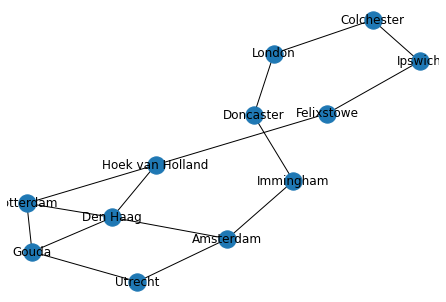

In [9]:
nx.draw(G, with_labels=True)

## Shortest path algorithms
- If weights, they should be positive.
- Shortest path can be calculated from origin or origin/destination pairs.

In [10]:
nx.single_source_shortest_path(G, source='Amsterdam')

{'Amsterdam': ['Amsterdam'],
 'Utrecht': ['Amsterdam', 'Utrecht'],
 'Den Haag': ['Amsterdam', 'Den Haag'],
 'Immingham': ['Amsterdam', 'Immingham'],
 'Gouda': ['Amsterdam', 'Utrecht', 'Gouda'],
 'Hoek van Holland': ['Amsterdam', 'Den Haag', 'Hoek van Holland'],
 'Rotterdam': ['Amsterdam', 'Den Haag', 'Rotterdam'],
 'Doncaster': ['Amsterdam', 'Immingham', 'Doncaster'],
 'Felixstowe': ['Amsterdam', 'Den Haag', 'Hoek van Holland', 'Felixstowe'],
 'London': ['Amsterdam', 'Immingham', 'Doncaster', 'London'],
 'Ipswich': ['Amsterdam',
  'Den Haag',
  'Hoek van Holland',
  'Felixstowe',
  'Ipswich'],
 'Colchester': ['Amsterdam', 'Immingham', 'Doncaster', 'London', 'Colchester']}

In [12]:
nx.dijkstra_path(G, source='Amsterdam', target='London', weight='dist')

['Amsterdam',
 'Den Haag',
 'Hoek van Holland',
 'Felixstowe',
 'Ipswich',
 'Colchester',
 'London']

In [13]:
nx.dijkstra_path(G, source='Amsterdam', target='London')

['Amsterdam', 'Immingham', 'Doncaster', 'London']

In [14]:
nx.dijkstra_path_length(G, source='Amsterdam', target='London', weight='dist')

453

In [18]:
list(nx.all_shortest_paths(G, source='Amsterdam', target='Gouda'))

[['Amsterdam', 'Utrecht', 'Gouda'], ['Amsterdam', 'Den Haag', 'Gouda']]

In [21]:
ams_to_lon = nx.dijkstra_path(G, source='Amsterdam', target='London')

In [23]:
path_subgraph = G.subgraph(nodes=ams_to_lon)

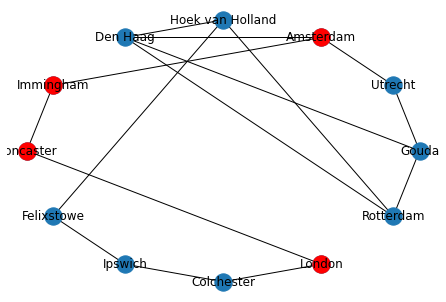

In [27]:
circ_pos = nx.circular_layout(G)
nx.draw(G, pos=circ_pos, with_labels=True)
nx.draw_networkx_nodes(path_subgraph, pos=circ_pos, node_color='red')

### Betweenness centrality
- Measure of importance of a node as a *bridge*: ranking based on number of shortest paths passing to a node.

In [28]:
betweenness = nx.betweenness_centrality(G)

In [30]:
sorted(betweenness) # Higher is better

['Amsterdam',
 'Colchester',
 'Den Haag',
 'Doncaster',
 'Felixstowe',
 'Gouda',
 'Hoek van Holland',
 'Immingham',
 'Ipswich',
 'London',
 'Rotterdam',
 'Utrecht']

In [31]:
betweenness

{'Gouda': 0.06363636363636364,
 'Utrecht': 0.03636363636363636,
 'Amsterdam': 0.3090909090909091,
 'Hoek van Holland': 0.2636363636363636,
 'Den Haag': 0.28181818181818186,
 'Immingham': 0.22727272727272727,
 'Doncaster': 0.17272727272727273,
 'Felixstowe': 0.20909090909090908,
 'Ipswich': 0.15454545454545454,
 'Colchester': 0.11818181818181818,
 'London': 0.12727272727272726,
 'Rotterdam': 0.054545454545454536}

### Eigenvector centrality


In [32]:
eigenvector = nx.eigenvector_centrality(G)
sorted(eigenvector)

['Amsterdam',
 'Colchester',
 'Den Haag',
 'Doncaster',
 'Felixstowe',
 'Gouda',
 'Hoek van Holland',
 'Immingham',
 'Ipswich',
 'London',
 'Rotterdam',
 'Utrecht']

### Triangles

In [33]:
nx.triangles(G)

{'Gouda': 1,
 'Utrecht': 0,
 'Amsterdam': 0,
 'Hoek van Holland': 1,
 'Den Haag': 2,
 'Immingham': 0,
 'Doncaster': 0,
 'Felixstowe': 0,
 'Ipswich': 0,
 'Colchester': 0,
 'London': 0,
 'Rotterdam': 2}

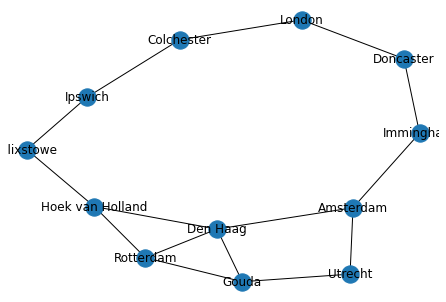

In [35]:
nx.draw(G, with_labels=True)

In [36]:
nx.clustering(G)

{'Gouda': 0.3333333333333333,
 'Utrecht': 0,
 'Amsterdam': 0,
 'Hoek van Holland': 0.3333333333333333,
 'Den Haag': 0.3333333333333333,
 'Immingham': 0,
 'Doncaster': 0,
 'Felixstowe': 0,
 'Ipswich': 0,
 'Colchester': 0,
 'London': 0,
 'Rotterdam': 0.6666666666666666}